<a href="https://colab.research.google.com/github/PranavKumarAV/Face-Mask-Detection/blob/main/Face_Mask_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Now importing my Datasets from my google drive**

In [ ]:
!gdown --id 1N9BAnv-zaqgzVisXt-_9bqYCExzswc1q

Downloading...
From: https://drive.google.com/uc?id=1N9BAnv-zaqgzVisXt-_9bqYCExzswc1q
To: /content/Mask_Detection_Dataset.zip
4.66GB [01:05, 71.4MB/s]


**Unziping my Dataset**

In [ ]:
!unzip Mask_Detection_Dataset.zip

Archive:  Mask_Detection_Dataset.zip
   creating: Mask_Detection_Dataset/
  inflating: Mask_Detection_Dataset/.DS_Store  
  inflating: __MACOSX/Mask_Detection_Dataset/._.DS_Store  
   creating: Mask_Detection_Dataset/Test/
   creating: Mask_Detection_Dataset/Train/
  inflating: Mask_Detection_Dataset/Test/.DS_Store  
  inflating: __MACOSX/Mask_Detection_Dataset/Test/._.DS_Store  
   creating: Mask_Detection_Dataset/Test/Mask/
   creating: Mask_Detection_Dataset/Test/No_Mask/
   creating: Mask_Detection_Dataset/Train/Mask/
   creating: Mask_Detection_Dataset/Train/No_Mask/
  inflating: Mask_Detection_Dataset/Test/Mask/6414.png  
  inflating: __MACOSX/Mask_Detection_Dataset/Test/Mask/._6414.png  
  inflating: Mask_Detection_Dataset/Test/Mask/1804.jpg  
  inflating: __MACOSX/Mask_Detection_Dataset/Test/Mask/._1804.jpg  
  inflating: Mask_Detection_Dataset/Test/Mask/6428.png  
  inflating: __MACOSX/Mask_Detection_Dataset/Test/Mask/._6428.png  
  inflating: Mask_Detection_Dataset/Test/Mask/

In [ ]:
TRAINING_DIR = "/content/Mask_Detection_Dataset/Train"
TESTING_DIR = "/content/Mask_Detection_Dataset/Test"

In [ ]:
print(len(os.listdir(TRAINING_DIR+"/Mask")))
print(len(os.listdir(TRAINING_DIR+"/No_Mask")))
print(len(os.listdir(TESTING_DIR+"/Mask")))
print(len(os.listdir(TESTING_DIR+"/No_Mask")))

904
778
121
169


**My Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1680 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


**Training**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=83,  
      epochs=15,
      validation_data=validation_generator,
      validation_steps=14,
      verbose=1)

Epoch 1/15
83/83 [==============================] - 248s 3s/step - loss: 0.2465 - acc: 0.8982 - val_loss: 1.7920 - val_acc: 0.5179
Epoch 2/15
83/83 [==============================] - 245s 3s/step - loss: 0.2817 - acc: 0.8886 - val_loss: 0.2345 - val_acc: 0.9286
Epoch 3/15
83/83 [==============================] - 245s 3s/step - loss: 0.2643 - acc: 0.8843 - val_loss: 0.1889 - val_acc: 0.9321
Epoch 4/15
83/83 [==============================] - 246s 3s/step - loss: 0.2303 - acc: 0.9072 - val_loss: 0.1861 - val_acc: 0.9214
Epoch 5/15
83/83 [==============================] - 244s 3s/step - loss: 0.2356 - acc: 0.9114 - val_loss: 0.1952 - val_acc: 0.9214
Epoch 6/15
83/83 [==============================] - 244s 3s/step - loss: 0.2693 - acc: 0.9048 - val_loss: 0.2505 - val_acc: 0.9000
Epoch 7/15
83/83 [==============================] - 245s 3s/step - loss: 0.2403 - acc: 0.9018 - val_loss: 0.2115 - val_acc: 0.9214
Epoch 8/15
83/83 [==============================] - 244s 3s/step - loss: 0.2760 - a

**Plotting graph for my training and validation sets**

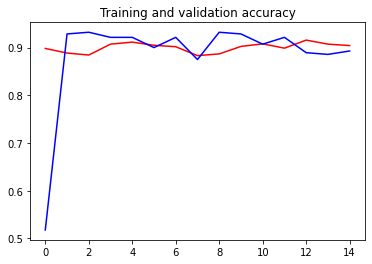

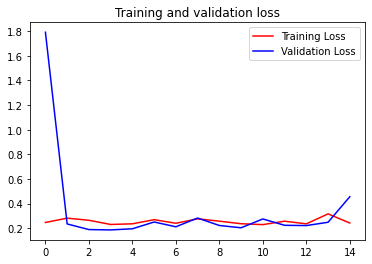

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Saving my Model**

In [ ]:
model.save("model_face_mask_final.h5")
print("Saved model to disk")

Saved model to disk


**Uploading Pictures manually to test the Model**

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " Without Mask")
  else:
    print(fn + " With Mask")

Saving 2903.jpeg to 2903.jpeg
Saving 1216020584.jpg.jpg to 1216020584.jpg.jpg
Saving anastasiia-chepinska-eGjHhmC_3ww-unsplash.jpg to anastasiia-chepinska-eGjHhmC_3ww-unsplash.jpg
[1.]
2903.jpeg Without Mask
[0.]
1216020584.jpg.jpg With Mask
[0.]
anastasiia-chepinska-eGjHhmC_3ww-unsplash.jpg With Mask
